<a href="https://colab.research.google.com/github/OzanArgitOnceken/Neural-Networks/blob/main/NeuralNetworkHandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Fri Dec 15 15:17:13 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install numpy
!pip install opencv-python
!pip install matplotlib
!pip install tensorflow

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [5]:
##CREATION OF MODEL

mnist =tf.keras.datasets.mnist
(train,trainResults),(test,testResults)=mnist.load_data()
train=tf.keras.utils.normalize(train,axis=1)# the datas are look like 0-255 before that it makes them between 0 and 1
test=tf.keras.utils.normalize(test,axis=1)

model=tf.keras.models.Sequential() #katman olusturulabilmesi icin

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#28*28 yani 784 lük bir model oluşturur (784 input) bunun sebebi de bize gelen imageler 28*28 lik imageler(pixel bakımından)

model.add(tf.keras.layers.Dense(128,activation='relu'))#her bir layerda 128 adet nöron olsun
#Eğer gizli katmandaki nöron sayısı çok az ise, modeliniz karmaşık ilişkileri öğrenmekte zorlanabilir ve performansı düşük olabilir. Underfitting riski artar.
#Eğer gizli katmandaki nöron sayısı çok fazla ise, modeliniz eğitim verilerine aşırı uyum sağlama riski artar ve yeni, görünmeyen veriler üzerinde iyi performans göstermeyebilir (overfitting).
#ReLu is for classification
#relu harici şeyler de kullanabilirsin ama classification için relu en iyisi  sanırım
model.add(tf.keras.layers.Dense(128,activation='relu'))


model.add(tf.keras.layers.Dense(10,activation='softmax'))#output layer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#adam=optimisation algorithm
#('sparse_categorical_crossentropy'): Kayıp fonksiyonu
#Metrics (['accuracy']) doğru tahmin edilen örneklerin toplam örnek sayısına oranını ifade eder.

#print(len(testResults))#->10 000

model.fit(train,trainResults,epochs=3)#train datasını trainResult ile eğitir (kendi oluşturduğumuz modele göre)
# epochs=3) ifadesi, modelin eğitim sürecini 3 epoch boyunca yapmasını sağlar.
#Bu, modelin eğitim veri kümesi üzerinde üç kez geçmesi ve her seferinde ağırlıklarını güncellemesi anlamına gelir.
model.save('handwritten.model')#modeli diske handwritten.model ismi ile kaydet (herhangi bir isim olur fark etmez)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2593 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1054 - accuracy: 0.9675
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9770


In [6]:
mnist =tf.keras.datasets.mnist
(train,trainResults),(test,testResults)=mnist.load_data()
train=tf.keras.utils.normalize(train,axis=1)# the datas are look like 0-255 before that it makes them between 0 and 1
test=tf.keras.utils.normalize(test,axis=1)
model=tf.keras.models.load_model('handwritten.model')
loss,accuracy=model.evaluate(test,testResults)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0953 - accuracy: 0.9717
0.09526734054088593
0.9717000126838684


1/1 [==============================] - 0s 51ms/step
This digit probably3


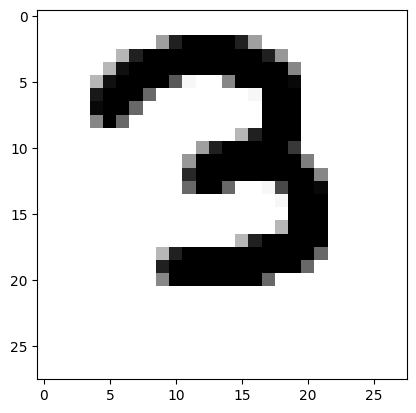

1/1 [==============================] - 0s 17ms/step
This digit probably6


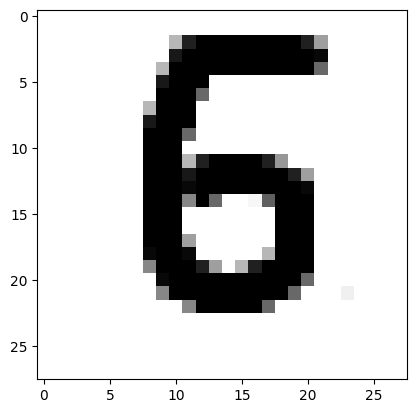

1/1 [==============================] - 0s 19ms/step
This digit probably2


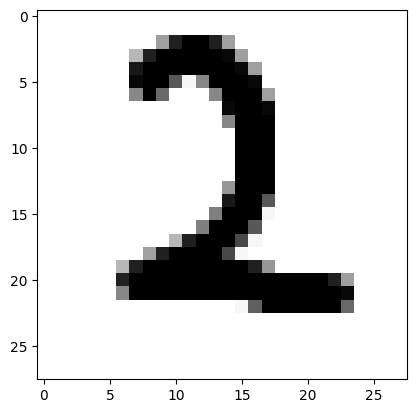

In [10]:
model=tf.keras.models.load_model('handwritten.model')
image_number=1
while os.path.isfile(f"digits/digit{image_number}.png"):
  try:
    img=cv2.imread(f"digits/digit{image_number}.png")[:,:,0]#0-> red 1->green 2->blue
    img=np.invert(np.array([img]))#Görüntüyü tersine çevirir ve ardından NumPy dizisi içine alır.
    #Model, beyaz rakam üzerine siyah zemin beklediği için bu tersine çevirme işlemi gerçekleştirildi
    prediction=model.predict(img)#modelin girişine uygun hale getirilir ve ardından model tarafından tahminleme yapılır.
    print(f"This digit probably{np.argmax(prediction)}")# Modelin tahminleme sonucunu ekrana yazdırır. np.argmax(prediction) ifadesi,
    # modelin çıkışındaki olasılık dağılımındaki en yüksek olasılığa sahip sınıfın endeksini verir.
    #Bu endeks, tahmin edilen rakamı temsil eder.
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
  except:
    print("ERROR")
  finally:
    image_number+=1